### **Importing Neccessary libraries**

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#scikit-learn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

### **Data Collection**

In [7]:
data=pd.read_csv(r"C:\Users\Admin\crop Recommendation.csv")
data

,N,P,K,temperature,humidity,ph,rainfall,label
0,101.0,17,47,29.494014,94.729813,6.185053,26.308209,muskmelon
1,98.0,8,51,26.179346,86.522581,6.259336,49.430510,watermelon
2,59.0,62,49,43.360515,93.351916,6.941497,114.778071,papaya
3,44.0,60,55,34.280461,90.555616,6.825371,98.540477,papaya
4,30.0,137,200,22.914300,90.704756,5.603413,118.604465,apple
...,...,...,...,...,...,...,...,...
2195,10.0,5,5,21.213070,91.353492,7.817846,112.983436,orange
2196,108.0,94,47,27.359116,84.546250,NaN,90.812505,banana
2197,11.0,36,31,27.920633,51.779659,6.475449,100.258567,mango
2198,11.0,124,204,13.429886,80.066340,6.361141,71.400430,grapes


### **Data Preprocessing**

In [8]:
#Detect Missing Values
data.isnull()

,N,P,K,temperature,humidity,ph,rainfall,label
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
2195,False,False,False,False,False,False,False,False
2196,False,False,False,False,False,True,False,False
2197,False,False,False,False,False,False,False,False
2198,False,False,False,False,False,False,False,False


In [9]:
#Total Missing Values
data.isnull().sum()

N              110
P                0
K                0
temperature      0
humidity         0
ph             110
rainfall         0
label            0
dtype: int64

In [10]:
#Handle Missing Values
for i in ('N','ph'):
    data[i].fillna(data[i].median(),inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_5424\3339201196.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[i].fillna(data[i].median(),inplace=True)


In [11]:
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

### **Data Analysis/Visualization**

### **Analysis**

In [12]:
#Data Types
data.dtypes

N              float64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [13]:
#Column Names
data.columns.tolist()

['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label']

In [14]:
#Number of Rows and Columns
data.shape

(2200, 8)

In [15]:
#Statistical Description
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.140000,53.362727,48.149091,25.616244,71.481779,6.468596,103.463655
std,36.164176,32.985883,50.647931,5.063749,22.263812,0.754735,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,22.000000,28.000000,20.000000,22.769375,60.261953,6.005875,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.426829,94.867624
75%,83.000000,68.000000,49.000000,28.561654,89.948771,6.890765,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   float64
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(5), int64(2), object(1)
memory usage: 137.6+ KB


### **Visualization**

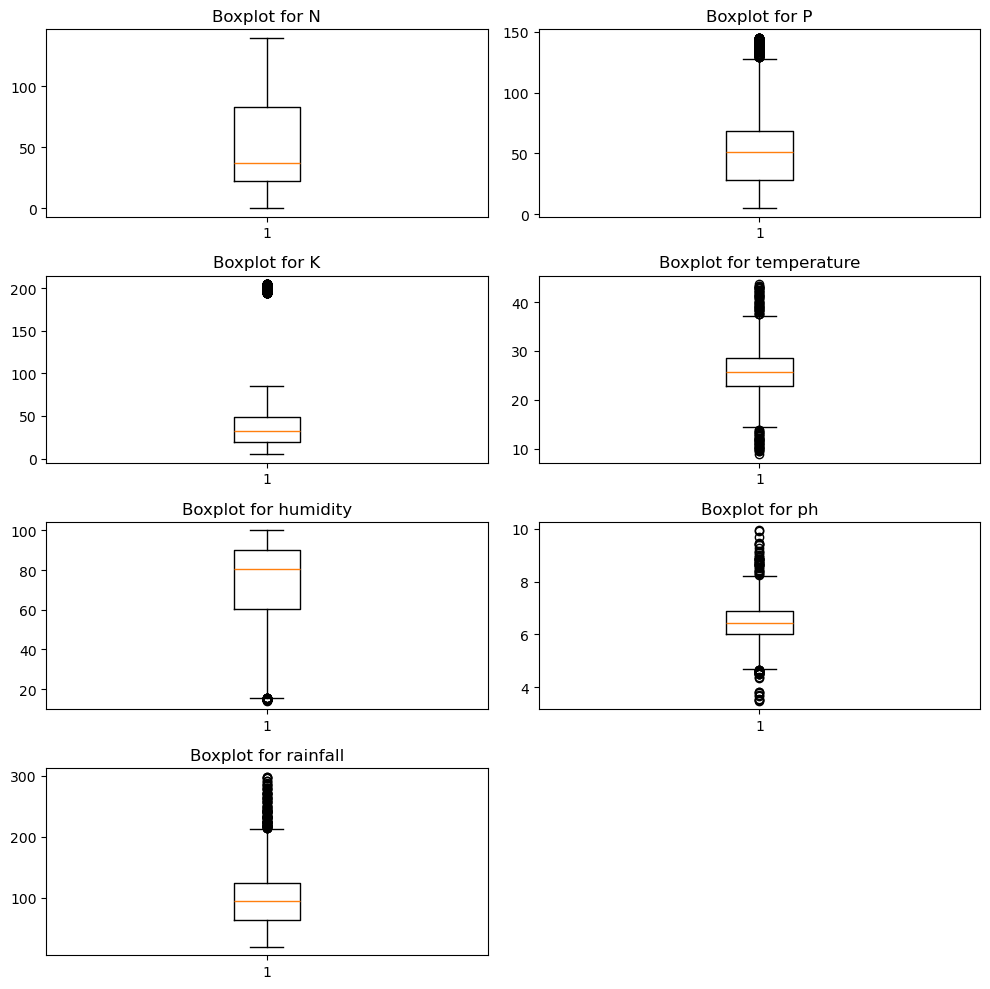

In [17]:
num_col = data.select_dtypes(include="number")
cols = num_col.columns
n = len(cols)
fig, axs = plt.subplots(4, 2, figsize=(10, 10))
axs = axs.ravel()
for i in range(n):
    axs[i].boxplot(data[cols[i]].dropna())
    axs[i].set_title(f"Boxplot for {cols[i]}")
for j in range(n, len(axs)):
    fig.delaxes(axs[j])  
plt.tight_layout()
plt.show()

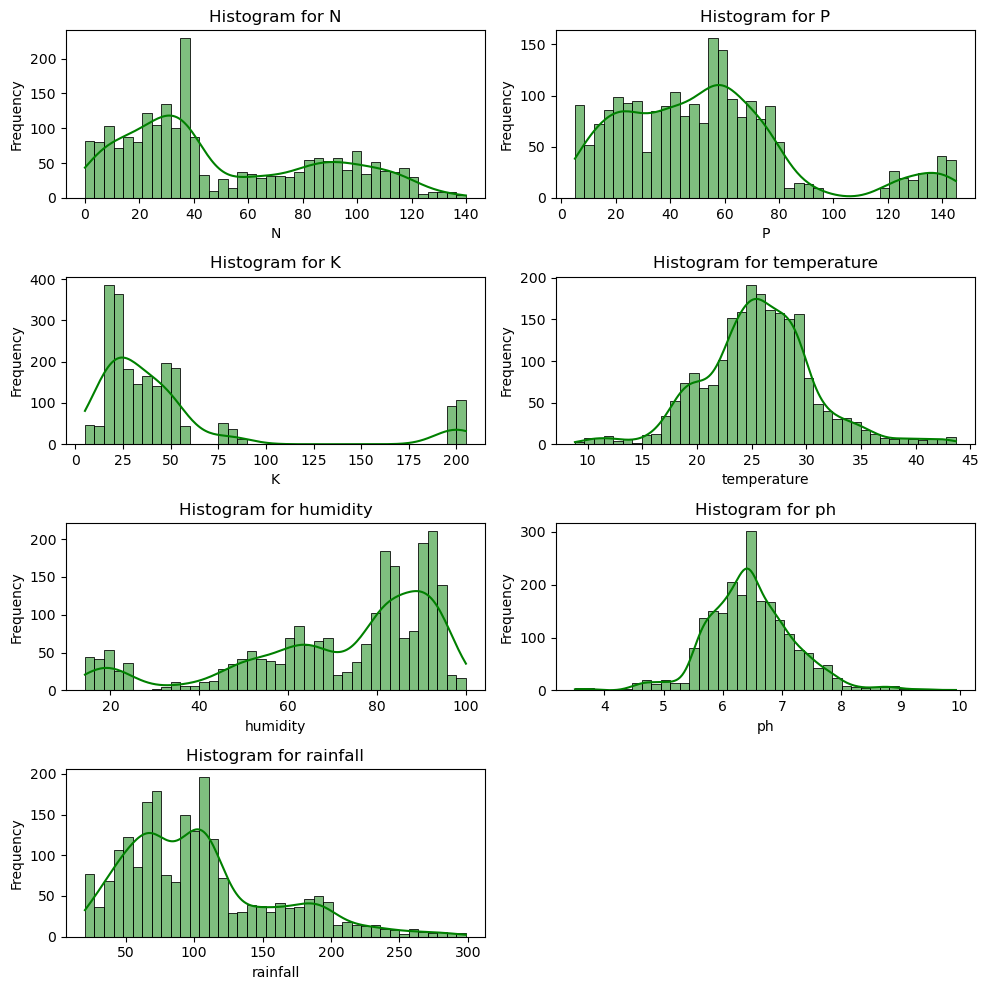

In [18]:
fig,axs=plt.subplots(4,2,figsize=(10,10))
axs=axs.ravel()
for i in range(n):
    sns.histplot(data[cols[i]], bins=40, kde=True, ax=axs[i], color="green")
    axs[i].set_title(f"Histogram for {cols[i]}")
    axs[i].set_ylabel("Frequency")
for j in range(n, len(axs)):
    fig.delaxes(axs[j])
plt.tight_layout()
plt.show()

### **KNeighbors Classifier**

### **Feature Engineering**

In [19]:
X=data.iloc[:,:-1]
X

,N,P,K,temperature,humidity,ph,rainfall
0,101.0,17,47,29.494014,94.729813,6.185053,26.308209
1,98.0,8,51,26.179346,86.522581,6.259336,49.430510
2,59.0,62,49,43.360515,93.351916,6.941497,114.778071
3,44.0,60,55,34.280461,90.555616,6.825371,98.540477
4,30.0,137,200,22.914300,90.704756,5.603413,118.604465
...,...,...,...,...,...,...,...
2195,10.0,5,5,21.213070,91.353492,7.817846,112.983436
2196,108.0,94,47,27.359116,84.546250,6.426829,90.812505
2197,11.0,36,31,27.920633,51.779659,6.475449,100.258567
2198,11.0,124,204,13.429886,80.066340,6.361141,71.400430


In [20]:
y=data.iloc[:,-1]
y

0        muskmelon
1       watermelon
2           papaya
3           papaya
4            apple
           ...    
2195        orange
2196        banana
2197         mango
2198        grapes
2199        lentil
Name: label, Length: 2200, dtype: object

In [21]:
feature_names = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

### **Splitting the Data into Train and Test**

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)

In [23]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1760, 7)
(440, 7)
(1760,)
(440,)


### **Standardization**

In [24]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### **Model Training**

In [25]:
k = 3
model1 = KNeighborsClassifier(n_neighbors=k)
model1.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [26]:
y_pred=model1.predict(X_test)
y_pred

array(['coffee', 'grapes', 'pomegranate', 'rice', 'grapes', 'orange',
       'grapes', 'rice', 'rice', 'mango', 'lentil', 'coffee', 'coconut',
       'coffee', 'pomegranate', 'papaya', 'maize', 'maize', 'lentil',
       'pomegranate', 'kidneybeans', 'rice', 'rice', 'orange', 'maize',
       'maize', 'jute', 'blackgram', 'muskmelon', 'apple', 'watermelon',
       'papaya', 'kidneybeans', 'orange', 'blackgram', 'cotton', 'maize',
       'apple', 'cotton', 'blackgram', 'mungbean', 'chickpea', 'papaya',
       'mothbeans', 'jute', 'pomegranate', 'kidneybeans', 'rice',
       'kidneybeans', 'apple', 'kidneybeans', 'cotton', 'mothbeans',
       'pomegranate', 'mango', 'papaya', 'kidneybeans', 'mungbean',
       'orange', 'mungbean', 'mungbean', 'banana', 'grapes', 'coffee',
       'pomegranate', 'chickpea', 'pigeonpeas', 'mango', 'jute',
       'pigeonpeas', 'coffee', 'jute', 'maize', 'coffee', 'grapes',
       'muskmelon', 'mothbeans', 'pigeonpeas', 'mango', 'grapes',
       'mungbean', 'or

In [27]:
y_test

97           coffee
744          grapes
1816    pomegranate
887            rice
1264         grapes
           ...     
615           mango
1980       chickpea
1844      mothbeans
1977    kidneybeans
711        mungbean
Name: label, Length: 440, dtype: object

### **Model Evaluation**

In [28]:
#Accuracy Score
accuracy1=accuracy_score(y_test,y_pred)
print("accuracy of the model is:",accuracy1*100)

accuracy of the model is: 97.72727272727273


In [29]:
#Confusion Matrix
cm1 = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm1)


Confusion Matrix:
 [[16  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 19  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 16  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  1  0  0  4  0]
 [ 0  0  0  0  0  0  0  0  0 22  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 24  0  0  0  0  0  0  0  0  0]
 [ 0  0  2  0  0  0  0  0  0  0  0  0  0 16  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 

<Axes: >

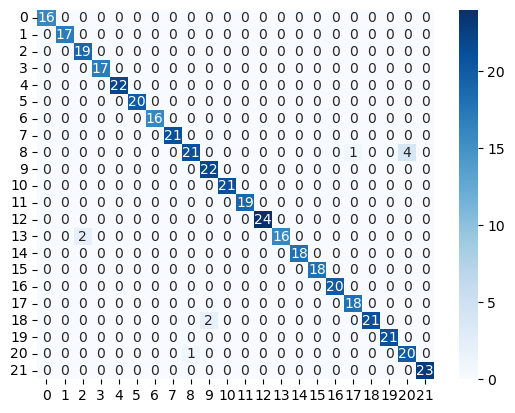

In [30]:
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues')

In [31]:
#Classification Report
report1 = classification_report(y_test, y_pred)
print("\nClassification Report:\n", report1)


Classification Report:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        16
      banana       1.00      1.00      1.00        17
   blackgram       0.90      1.00      0.95        19
    chickpea       1.00      1.00      1.00        17
     coconut       1.00      1.00      1.00        22
      coffee       1.00      1.00      1.00        20
      cotton       1.00      1.00      1.00        16
      grapes       1.00      1.00      1.00        21
        jute       0.95      0.81      0.88        26
 kidneybeans       0.92      1.00      0.96        22
      lentil       1.00      1.00      1.00        21
       maize       1.00      1.00      1.00        19
       mango       1.00      1.00      1.00        24
   mothbeans       1.00      0.89      0.94        18
    mungbean       1.00      1.00      1.00        18
   muskmelon       1.00      1.00      1.00        18
      orange       1.00      1.00      1.00        20
  

### **Decision Tree Classifier**

### **Feature Engineering**

In [61]:
X=data.iloc[:,:-1]
X

,N,P,K,temperature,humidity,ph,rainfall
0,101.0,17,47,29.494014,94.729813,6.185053,26.308209
1,98.0,8,51,26.179346,86.522581,6.259336,49.430510
2,59.0,62,49,43.360515,93.351916,6.941497,114.778071
3,44.0,60,55,34.280461,90.555616,6.825371,98.540477
4,30.0,137,200,22.914300,90.704756,5.603413,118.604465
...,...,...,...,...,...,...,...
2195,10.0,5,5,21.213070,91.353492,7.817846,112.983436
2196,108.0,94,47,27.359116,84.546250,6.426829,90.812505
2197,11.0,36,31,27.920633,51.779659,6.475449,100.258567
2198,11.0,124,204,13.429886,80.066340,6.361141,71.400430


In [62]:
y=data.iloc[:,-1]
y

0        muskmelon
1       watermelon
2           papaya
3           papaya
4            apple
           ...    
2195        orange
2196        banana
2197         mango
2198        grapes
2199        lentil
Name: label, Length: 2200, dtype: object

In [63]:
feature_names = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

### **Splitting the Data into Train and Test**

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)

In [65]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1760, 7)
(440, 7)
(1760,)
(440,)


### **Standardization**

In [66]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### **Model Training**

In [67]:
model2=DecisionTreeClassifier(criterion='entropy',max_depth=3)
model2.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [68]:
y_pred=model2.predict(X_test)
y_pred

array(['coffee', 'apple', 'orange', 'cotton', 'apple', 'orange', 'apple',
       'cotton', 'cotton', 'coffee', 'mothbeans', 'coffee', 'orange',
       'coffee', 'orange', 'cotton', 'mothbeans', 'mothbeans',
       'mothbeans', 'orange', 'pigeonpeas', 'cotton', 'cotton', 'orange',
       'pigeonpeas', 'mothbeans', 'chickpea', 'mothbeans', 'muskmelon',
       'apple', 'muskmelon', 'cotton', 'mothbeans', 'orange', 'mothbeans',
       'cotton', 'pigeonpeas', 'apple', 'cotton', 'mothbeans', 'cotton',
       'chickpea', 'cotton', 'mothbeans', 'cotton', 'orange',
       'pigeonpeas', 'cotton', 'pigeonpeas', 'apple', 'mothbeans',
       'cotton', 'mothbeans', 'orange', 'coffee', 'cotton', 'pigeonpeas',
       'cotton', 'orange', 'cotton', 'cotton', 'apple', 'apple', 'coffee',
       'orange', 'chickpea', 'pigeonpeas', 'coffee', 'chickpea',
       'pigeonpeas', 'coffee', 'cotton', 'pigeonpeas', 'coffee', 'apple',
       'muskmelon', 'mothbeans', 'pigeonpeas', 'coffee', 'apple',
       'cotton',

In [69]:
y_test

97           coffee
744          grapes
1816    pomegranate
887            rice
1264         grapes
           ...     
615           mango
1980       chickpea
1844      mothbeans
1977    kidneybeans
711        mungbean
Name: label, Length: 440, dtype: object

### **Model Evaluation**

In [77]:
#Accuracy Score
accuracy2=accuracy_score(y_test,y_pred)
print("accuracy of the model is:",accuracy2*100)

accuracy of the model is: 33.409090909090914


In [71]:
#Confusion Matrix
cm2 = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm2)


Confusion Matrix:
 [[16  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0]
 [ 0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 22  0  0  0  0  0]
 [ 0  0  0  0  0 19  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0 16  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  9  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  3  0  0  0  0 19  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  6  0  0  0  0 13  0  0  0]
 [ 0  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 

<Axes: >

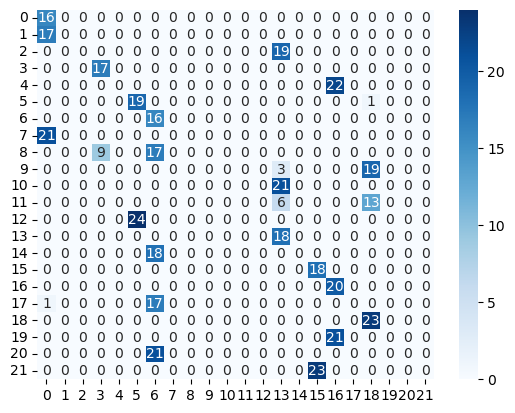

In [72]:
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues')

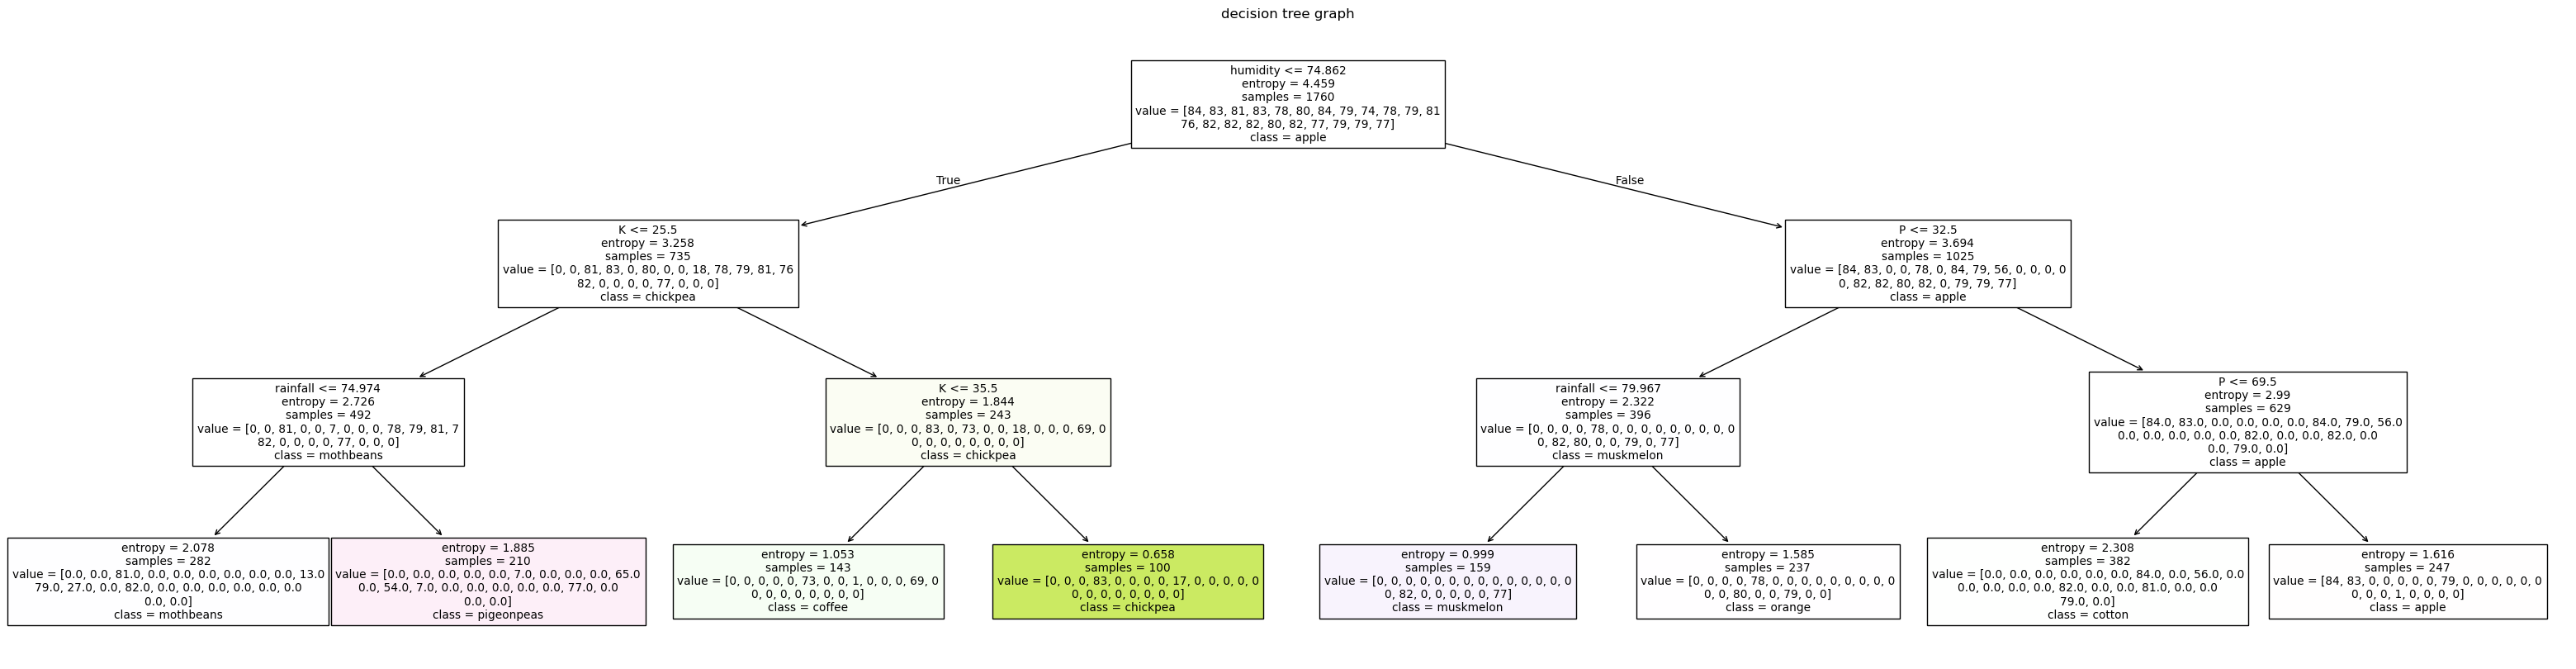

In [73]:
plt.figure(figsize=(40,10))
plot_tree(model2,
          filled=True,
          feature_names=X.columns,
          class_names=[str(cls) for cls in model2.classes_])
plt.title("decision tree graph")
plt.show()

In [74]:
#Classification Report
report2 = classification_report(y_test, y_pred)
print("\nClassification Report:\n", report2)


Classification Report:
               precision    recall  f1-score   support

       apple       0.29      1.00      0.45        16
      banana       0.00      0.00      0.00        17
   blackgram       0.00      0.00      0.00        19
    chickpea       0.65      1.00      0.79        17
     coconut       0.00      0.00      0.00        22
      coffee       0.44      0.95      0.60        20
      cotton       0.18      1.00      0.30        16
      grapes       0.00      0.00      0.00        21
        jute       0.00      0.00      0.00        26
 kidneybeans       0.00      0.00      0.00        22
      lentil       0.00      0.00      0.00        21
       maize       0.00      0.00      0.00        19
       mango       0.00      0.00      0.00        24
   mothbeans       0.27      1.00      0.42        18
    mungbean       0.00      0.00      0.00        18
   muskmelon       0.44      1.00      0.61        18
      orange       0.32      1.00      0.48        20
  

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### **Random Forest Classifier**

### **Feature Engineering**

In [75]:
X=data.iloc[:,:-1]
X

,N,P,K,temperature,humidity,ph,rainfall
0,101.0,17,47,29.494014,94.729813,6.185053,26.308209
1,98.0,8,51,26.179346,86.522581,6.259336,49.430510
2,59.0,62,49,43.360515,93.351916,6.941497,114.778071
3,44.0,60,55,34.280461,90.555616,6.825371,98.540477
4,30.0,137,200,22.914300,90.704756,5.603413,118.604465
...,...,...,...,...,...,...,...
2195,10.0,5,5,21.213070,91.353492,7.817846,112.983436
2196,108.0,94,47,27.359116,84.546250,6.426829,90.812505
2197,11.0,36,31,27.920633,51.779659,6.475449,100.258567
2198,11.0,124,204,13.429886,80.066340,6.361141,71.400430


In [47]:
y=data.iloc[:,-1]
y

0        muskmelon
1       watermelon
2           papaya
3           papaya
4            apple
           ...    
2195        orange
2196        banana
2197         mango
2198        grapes
2199        lentil
Name: label, Length: 2200, dtype: object

In [48]:
feature_names = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

### **Splitting the Data into Train and Test**

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)

In [50]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1760, 7)
(440, 7)
(1760,)
(440,)


### **Standardization**

In [51]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### **Model Training**

In [52]:
model3=RandomForestClassifier(criterion='entropy',n_estimators=10)
model3.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [53]:
y_pred=model3.predict(X_test)
y_pred

array(['coffee', 'grapes', 'pomegranate', 'rice', 'grapes', 'orange',
       'grapes', 'rice', 'rice', 'mango', 'lentil', 'coffee', 'coconut',
       'coffee', 'pomegranate', 'papaya', 'maize', 'maize', 'lentil',
       'pomegranate', 'pigeonpeas', 'rice', 'rice', 'orange', 'maize',
       'maize', 'jute', 'blackgram', 'muskmelon', 'apple', 'watermelon',
       'papaya', 'kidneybeans', 'orange', 'blackgram', 'cotton', 'maize',
       'apple', 'cotton', 'blackgram', 'mungbean', 'chickpea', 'papaya',
       'mothbeans', 'jute', 'pomegranate', 'kidneybeans', 'jute',
       'kidneybeans', 'apple', 'kidneybeans', 'cotton', 'mothbeans',
       'pomegranate', 'mango', 'papaya', 'kidneybeans', 'mungbean',
       'orange', 'mungbean', 'mungbean', 'banana', 'grapes', 'coffee',
       'pomegranate', 'chickpea', 'pigeonpeas', 'mango', 'jute',
       'pigeonpeas', 'coffee', 'jute', 'maize', 'coffee', 'grapes',
       'muskmelon', 'mothbeans', 'pigeonpeas', 'mango', 'grapes',
       'mungbean', 'ora

In [54]:
y_test

97           coffee
744          grapes
1816    pomegranate
887            rice
1264         grapes
           ...     
615           mango
1980       chickpea
1844      mothbeans
1977    kidneybeans
711        mungbean
Name: label, Length: 440, dtype: object

### **Model Evaluation**

In [55]:
#Accuracy Score
accuracy3=accuracy_score(y_test,y_pred)
print("accuracy of the model is:",accuracy3*100)

accuracy of the model is: 99.54545454545455


In [56]:
#Confusion Matrix
cm3 = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm3)


Confusion Matrix:
 [[16  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 19  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 16  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 25  0  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0 22  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 24  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 

<Axes: >

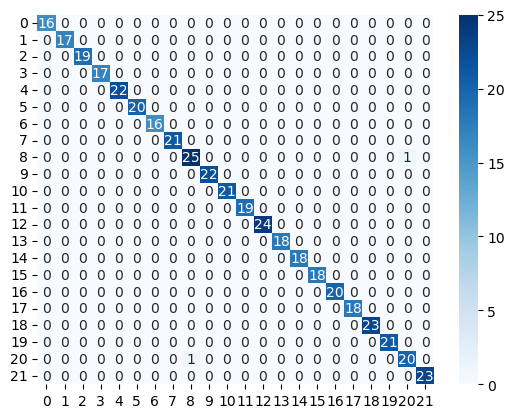

In [57]:
sns.heatmap(cm3, annot=True, fmt='d', cmap='Blues')

In [58]:
#Classification Report
report3 = classification_report(y_test, y_pred)
print("\nClassification Report:\n", report3)


Classification Report:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        16
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        19
    chickpea       1.00      1.00      1.00        17
     coconut       1.00      1.00      1.00        22
      coffee       1.00      1.00      1.00        20
      cotton       1.00      1.00      1.00        16
      grapes       1.00      1.00      1.00        21
        jute       0.96      0.96      0.96        26
 kidneybeans       1.00      1.00      1.00        22
      lentil       1.00      1.00      1.00        21
       maize       1.00      1.00      1.00        19
       mango       1.00      1.00      1.00        24
   mothbeans       1.00      1.00      1.00        18
    mungbean       1.00      1.00      1.00        18
   muskmelon       1.00      1.00      1.00        18
      orange       1.00      1.00      1.00        20
  

### **Comparing different models**

In [59]:
print(accuracy1)
print(accuracy2)
print(accuracy3)

0.9772727272727273
0.3340909090909091
0.9954545454545455


### **Testing on the New Data**

In [60]:
#new data
new_sample=np.array([[75, 56, 26, 22.55, 83.09, 7.58, 81.71]])
predicted_class=model2.predict(new_sample)
print("predicted class:",predicted_class)


predicted class: ['cotton']


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
